In [1]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path
import pandas as pd

%matplotlib inline
sns.set_theme(context="talk", style="darkgrid", rc={"figure.figsize": (12, 8)})
sys.path.append(str(Path().home() / "CarbonLab" / "reflutils"))

import reflutils as ru

sharepoint = Path().home() / "Washington State University (email.wsu.edu)"/"Carbon Lab Research Group - Documents"
csv_bin = sharepoint/"Harlan Heilman"/".refl"/".csv"
data_bin = sharepoint/"Synchrotron Logistics and Data"/"ALS - Berkeley"/"Data"/"BL1101"/"2023Nov"/"XRR"/"Processed"

# November 2023

## Outline

1. Review of Beamtime Data
    - Comparing Data
    - Brewster Angle
2. MCMC Fitting
    - What Is MCMC Fitting
    - Building a Model
    - Fitting the Model

## Review of Beamtime Data

One goal of this beamtime is to determine if the samples are deteriorated. To do this, we will compare the reflectivity curves for both S and P polarized light.

In [2]:
# Load files
june_283p7_s = pd.read_csv(csv_bin / "zrt_283.7_100.csv", usecols=["Q", "Refl", "Err"])
june_283p7_p = pd.read_csv(csv_bin / "zrt_283.7_190.csv", usecols=["Q", "Refl", "Err"])

nov_283p7_s = pd.read_parquet(
    data_bin / "ZRT" / "283.7_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
nov_283p7_p = pd.read_parquet(
    data_bin / "ZRT" / "283.7_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Harlan Heilman\\Washington State University (email.wsu.edu)\\Carbon Lab Research Group - Documents\\Harlan Heilman\\.refl\\.csv\\zrt_283.7_100.csv'

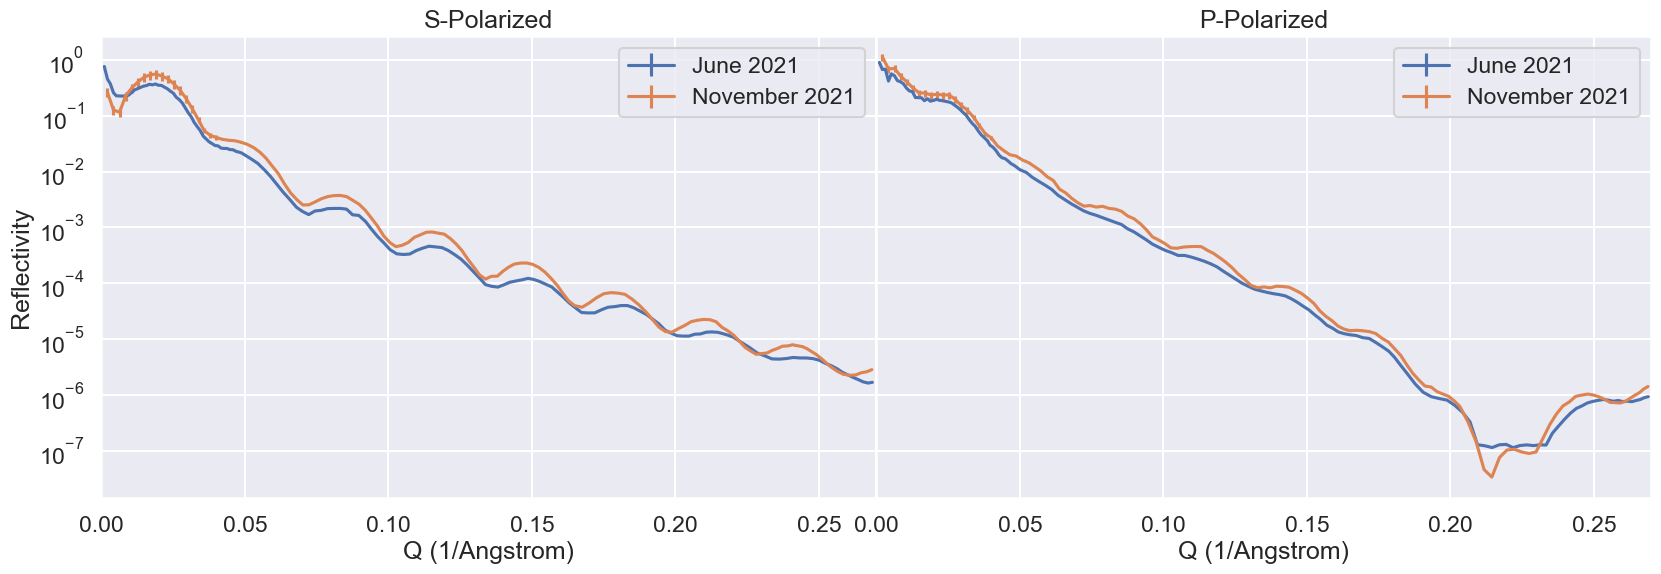

In [63]:
fig, ax = plt.subplots(
    ncols=2, figsize=(20, 6), sharey=True, sharex=True, gridspec_kw={"wspace": 0}
)

june_283p7_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="June 2021", logy=True)
nov_283p7_s.plot(
    x="Q", y="Refl", yerr="Err", ax=ax[0], label="November 2021", logy=True
)
june_283p7_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="June 2021", logy=True)
nov_283p7_p.plot(
    x="Q", y="Refl", yerr="Err", ax=ax[1], label="November 2021", logy=True
)

ax[0].set_title("S-Polarized")
ax[0].set_ylabel("Reflectivity")
ax[0].set_xlabel("Q (1/Angstrom)")
ax[0].set_xlim(0, 0.27)
ax[0].legend()

ax[1].set_title("P-Polarized")
ax[1].set_xlabel("Q (1/Angstrom)")
ax[1].legend()

## Brewster Angle
As you can see above, the brewster angle appears in reflectivity curves for P polarized light, i.e. light polarized parallel to the scattering plane. For a single infinitely thick layer, there is no reflectance at this incident angle. However, adding layers and thicknesses to the model, breaks this, allowing for reflectance arround the brewster angle. 

### Some examples in the data

<Axes: xlabel='Q'>

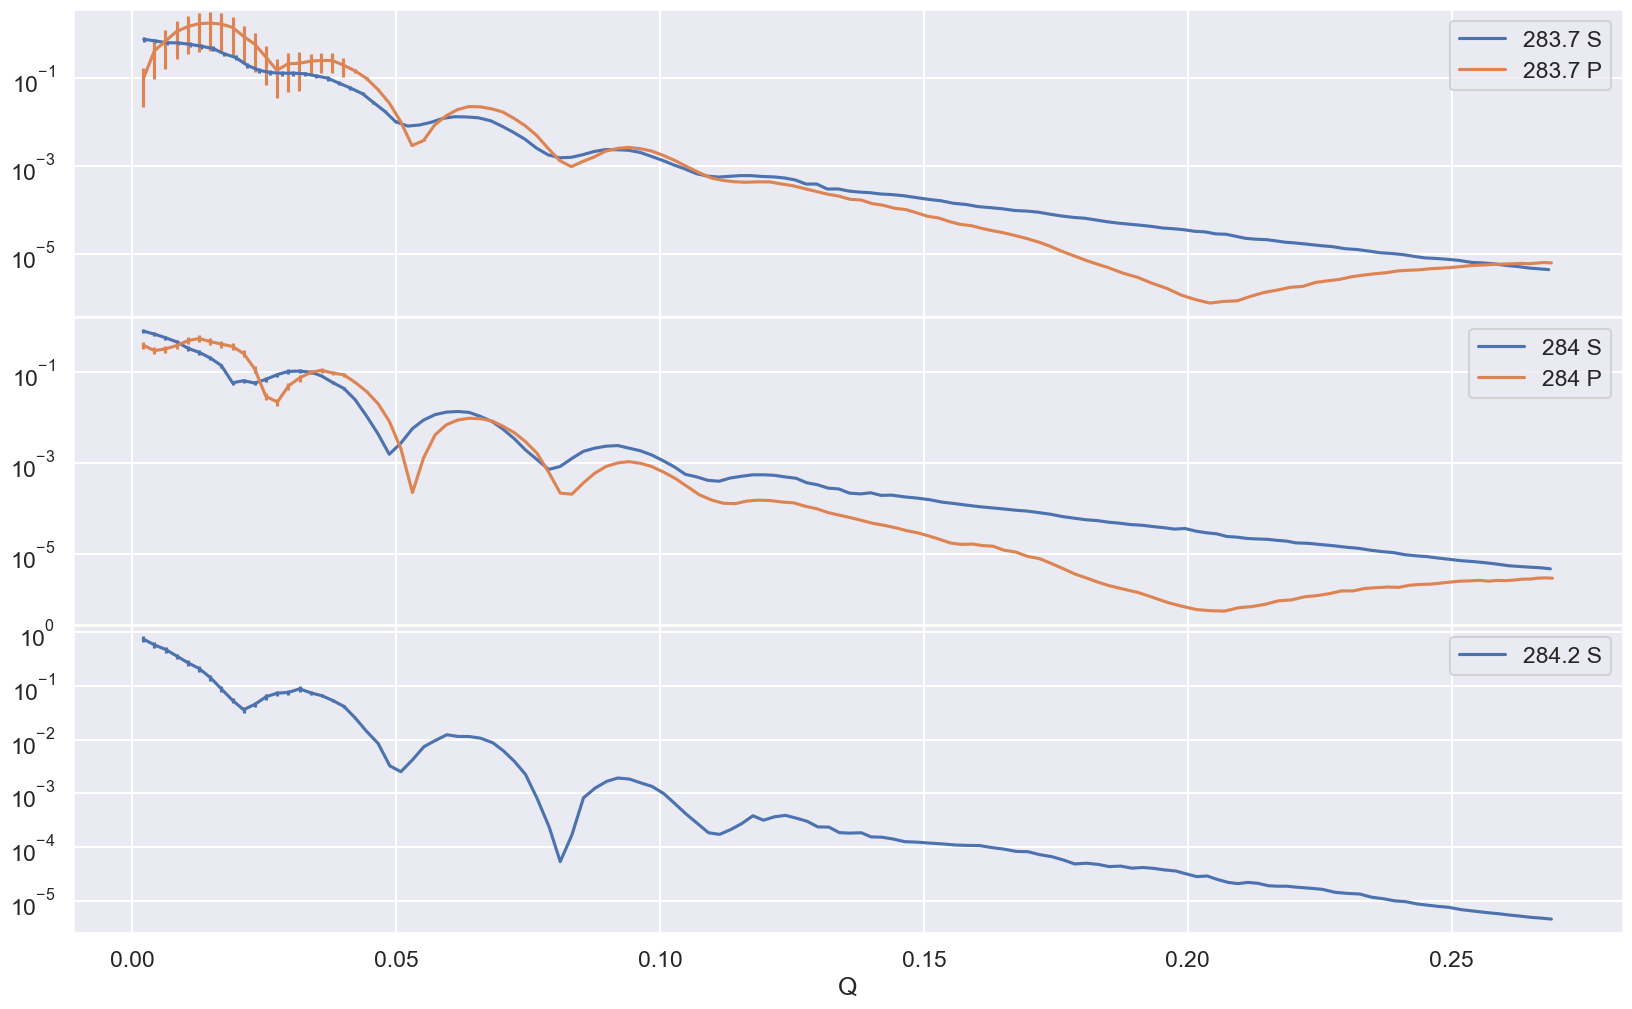

In [126]:
c60_283p7_s = pd.read_parquet(
    data_bin / "C60-ZnPc" / "283.7_100.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_283p7_p = pd.read_parquet(
    data_bin / "C60-ZnPc" / "283.7_190.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_284_s = pd.read_parquet(
    data_bin / "C60-ZnPc" / "284.0_100.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_284_p = pd.read_parquet(
    data_bin / "C60-ZnPc" / "284.0_190.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_284p2_s = pd.read_parquet(
    data_bin / "C60-ZnPc" / "284.2_100.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
# c50_284p2_p = pd.read_parquet(data_bin/"C60-ZnPc" / "284.2_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"])

fig, ax = plt.subplots(
    nrows=3, figsize=(20, 12), sharex=True, gridspec_kw={"wspace": 0, "hspace": 0}
)
c60_283p7_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 S", logy=True)
c60_283p7_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 P", logy=True)
c60_284_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 S", logy=True)
c60_284_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 P", logy=True)
c60_284p2_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 S", logy=True)
# c50_284p2_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 P", logy=True)

Note that I need to transfer the 284.2 p pol data

<Axes: xlabel='Q'>

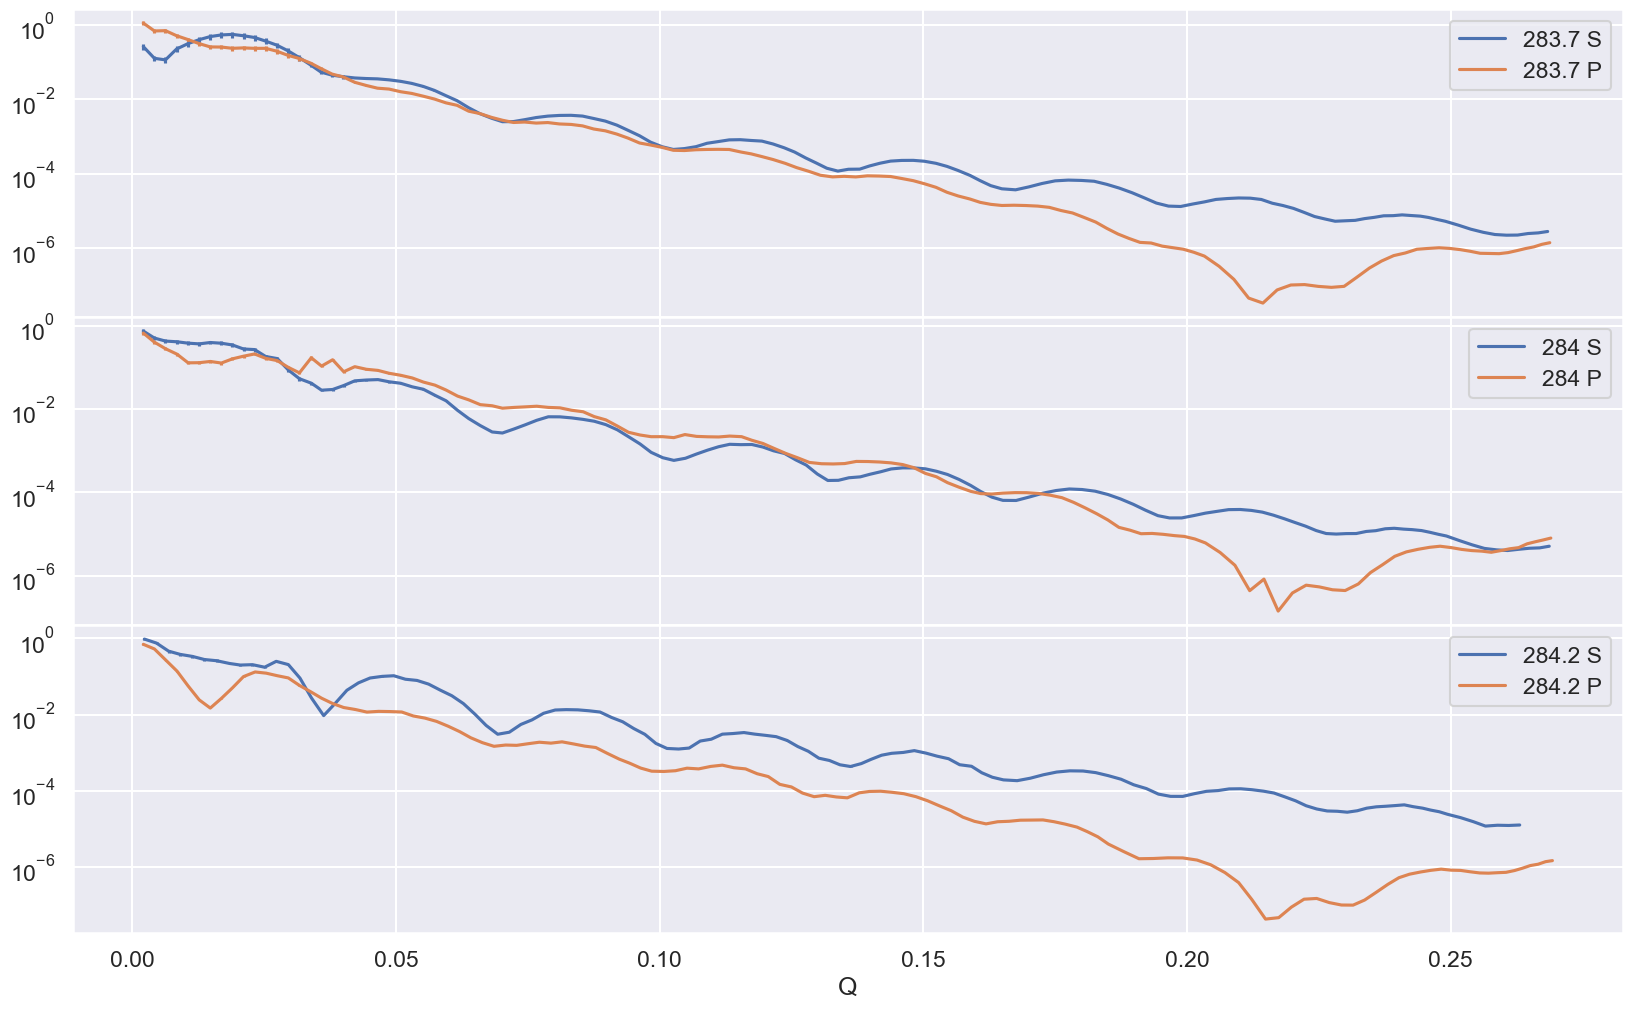

In [127]:
znpc_283p7_s = pd.read_parquet(
    data_bin / "ZRT" / "283.7_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_283p7_p = pd.read_parquet(
    data_bin / "ZRT" / "283.7_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p0_s = pd.read_parquet(
    data_bin / "ZRT" / "284.0_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p0_p = pd.read_parquet(
    data_bin / "ZRT" / "284.0_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p2_s = pd.read_parquet(
    data_bin / "ZRT" / "284.2_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p2_s = znpc_284p2_s.iloc[:123]
znpc_284p2_p = pd.read_parquet(
    data_bin / "ZRT(2)" / "284.2_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)

fig, ax = plt.subplots(
    nrows=3, figsize=(20, 12), sharex=True, gridspec_kw={"wspace": 0, "hspace": 0}
)
znpc_283p7_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 S", logy=True)
znpc_283p7_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 P", logy=True)
znpc_284p0_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 S", logy=True)
znpc_284p0_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 P", logy=True)
znpc_284p2_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 S", logy=True)
znpc_284p2_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 P", logy=True)

Note that this scan is not the best, I need to reprocess the data since this one got messed up. 

## MCMC Fitting

MCMC is a method of sampling a probability distribution. This is done by starting at a random point in the distribution, and then randomly walking around the distribution. If the new point is more probable than the old point, then the new point is accepted. If the new point is less probable than the old point, then the new point is accepted with a probability equal to the ratio of the new point to the old point. Doing this with a single point is useless, so you should spawn several such "Walkers" into this distribution and let them all walk around looking then at the end of the walk, you can look at the distribution of points and see what the probability distribution looks like. 

In general, we want to approach MCMC from a Baysean approach, i.e. we must assume that the probability distribution is a product of the prior and the likelihood.

$$
    P(\theta | U) = \frac{P(U|\theta) P(\theta)}{P(U)}
$$
where we call $U$ the data, and $\theta$ the parameters. To break this down, we have the following terms

$$
    P(\theta | U) = \text{Posterior} \\
    P(U|\theta) = \text{Likelihood} \\
    P(\theta) = \text{Prior} \\
    P(U) = \text{Evidence} \\
$$

### LM vs MCMC
The posterior is the probability distribution of the parameters given the data. The likelihood is the probability of the data given the parameters. The prior is the probability of the parameters given no data, this is a key aspect of baysean statistics, as it allows us to incorporate prior knowledge into the model. The evidence is the probability of the data, this is a normalization constant that is not important for most physical applications allowing us to treat it as a normalization factor, i.e.

$$
    P(\theta | U) \propto P(U|\theta) P(\theta). \\
$$

Now, if we presuppose that all errors in the system are gaussian, and al parameters are linearly independent, then we can write the likelihood as a product of gaussians, and the prior as a uniform distribution. This is a very strong assumption, but it is a good starting point.

$$
    P(U | \theta) \propto P_i(\theta)\prod_i P_i(U_i - f_i(\theta))\\
$$

Once more, the product is just a normalization factor, so we can ignore it. This leaves us with the following expression

$$
    P(U | \theta) \propto \prod_i P_i(U_i - f_i(\theta))\\
$$

Now, explicitly, the likelyhood is a N-dimensional gaussian function meaning that we can write this out as 

$$
    P(U | \theta) \propto \prod_i \exp\left(-\frac{(U - f(\theta))^2}{2\sigma_i^2}\right).
$$  

The goal of any fitting is to determine the most likely set of parameters that give the so called truth. This is done by maximizing the posterior probability, and we have shown, that this is an exactly proportional task to maximizing the likelyhood. By convention, we optimize by minimiziging a "cost function", or "objective function"; to do this we take the negative log of the likelyhood providing us with a convex function to minimize, i.e., 

$$
    -\log(P(U | \theta)) = \sum_i \frac{(U - f(\theta))^2}{2\sigma_i^2} = \chi^2.
$$

This is the so called $\chi^2$ function, and is the basis of all least squares fitting, and the Levenberg-Marquardt algorithm. 

While this method works fine if we make the strong assumptions made above, it is easier to sample the posterior distribution directly though Monte-Carlo sampling. This is the basis for the MCMC technique. 

### Building a Model

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

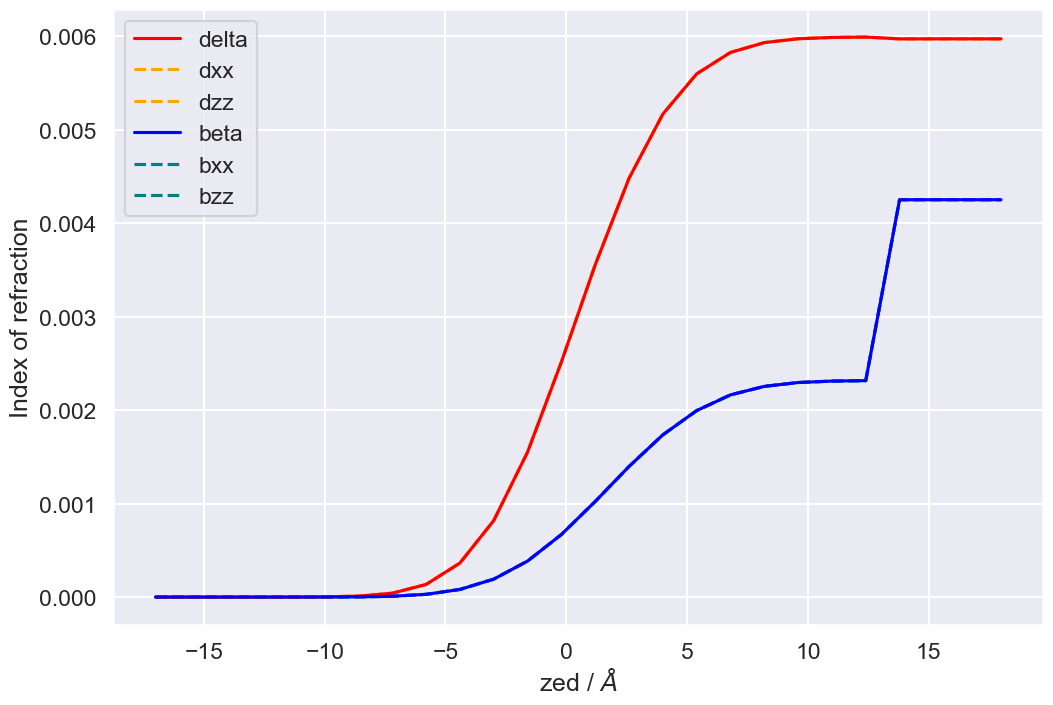

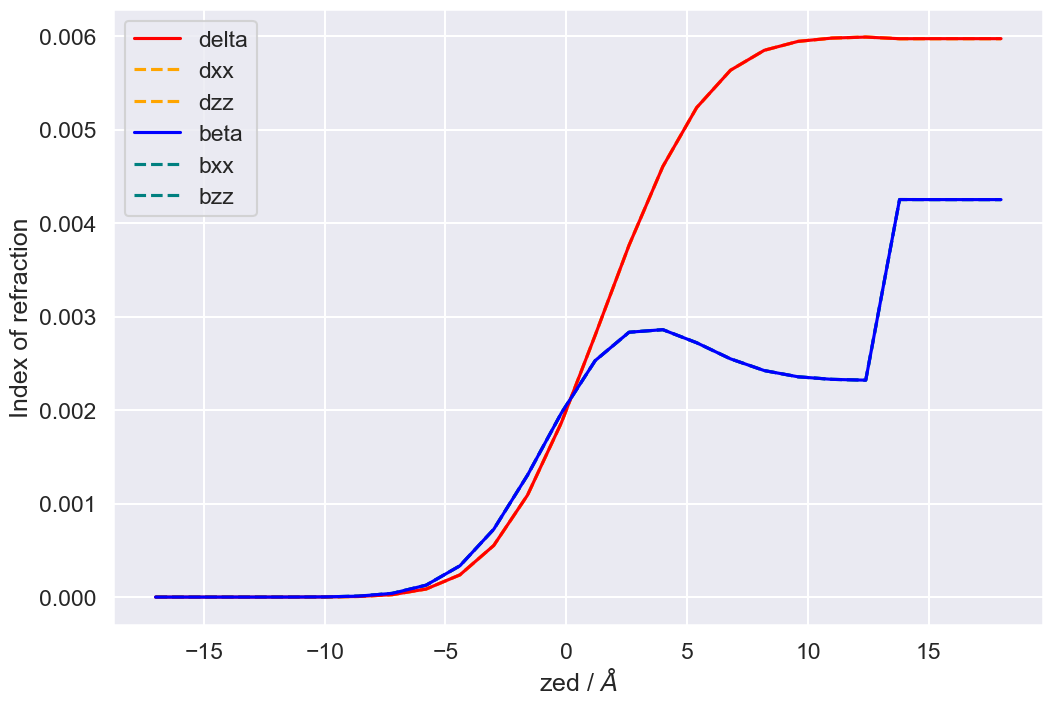

In [142]:
from pypxr.structure import *
from pypxr.reflectivity import *
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective
from refnx._lib.emcee.moves.de import *

en1 = 320  # eV
en2 = 250  # eV

si = PXR_MaterialSLD("Si", 2.33, name="Si")  # substrate
vacuum = PXR_MaterialSLD("", 1, name="Vacuum")  # Superstrate

# 320 eV
sio21 = PXR_MaterialSLD("SiO2", 2.28, name="SiO21")  # surface oxide
n_gunk_1 = 0.005 + 0.001j
carbon1 = PXR_SLD(n_gunk_1, symmetry="iso", name="Carbon1")  # surface carbon

# 250 eV
sio22 = PXR_MaterialSLD("SiO2", 2.28, name="SiO22")  # surface oxide
n_gunk_2 = 0.003 + 0.005j
carbon2 = PXR_SLD(n_gunk_2, symmetry="iso", name="Carbon2")  # surface carbon


si_slab = si(0, 0)

sio2_slab_en1 = sio21(10, 3.07)
carbon_slab_en1 = carbon1(3, 3)

sio2_slab_en2 = sio22(10, 3.07)
carbon_slab_en2 = carbon2(3, 3)

structure1 = vacuum | carbon_slab_en1 | sio2_slab_en1 | si_slab
structure2 = vacuum | carbon_slab_en2 | sio2_slab_en2 | si_slab

structure1.plot()
structure2.plot()

Notice how on resonance, the carbon layer has a larger $\beta$ than it does below the edge at $250$ eV. 

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

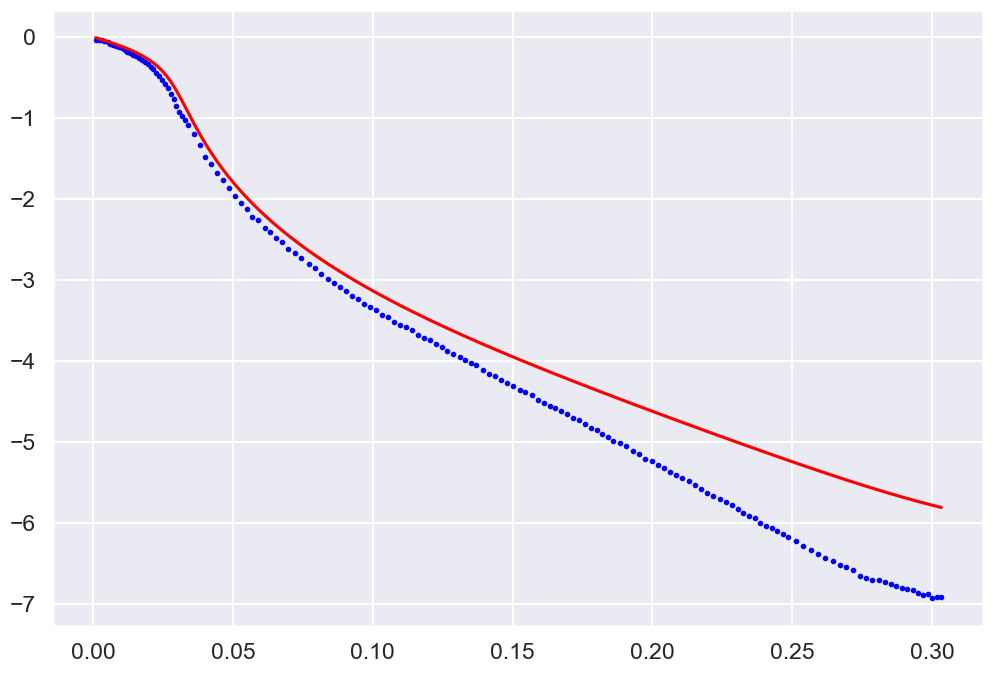

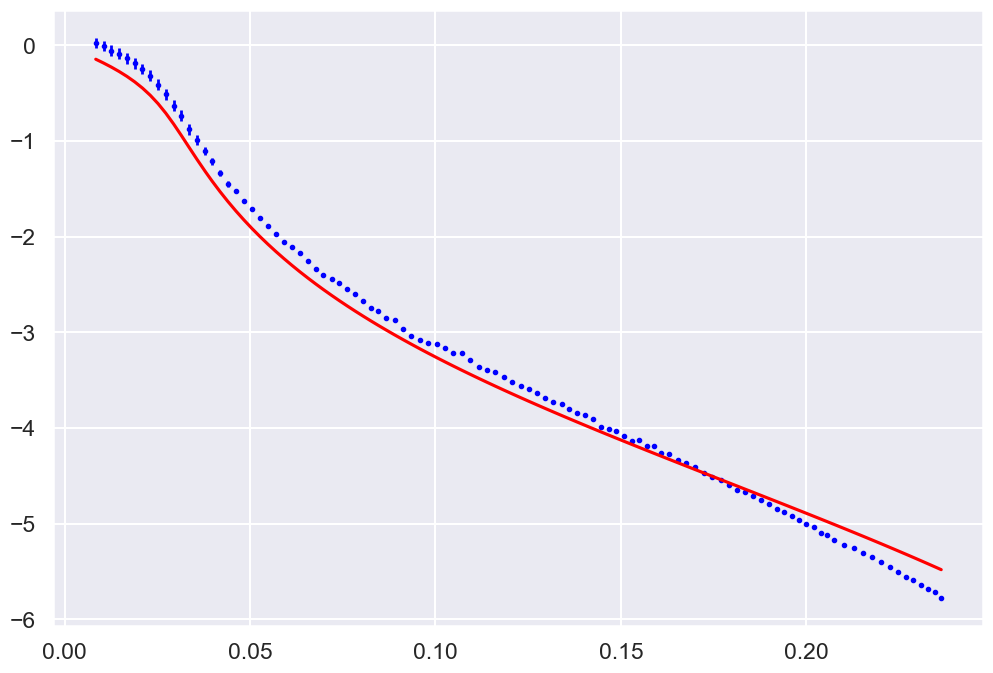

In [143]:
si_250p0 = pd.read_parquet(
    data_bin / "BareSi" / "250.0_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
si_320p0 = pd.read_csv(csv_bin / "bareSi_320.csv", usecols=["Q", "Refl", "Err"])


def to_refnx_dataset(refl):
    data = (refl.Q, refl.Refl, refl.Err)
    return ReflectDataset(data)


si_250p0 = to_refnx_dataset(si_250p0[3:])
si_320p0 = to_refnx_dataset(si_320p0)

model_1 = PXR_ReflectModel(structure1, energy=en1, pol="s", name="320 eV")
model_2 = PXR_ReflectModel(structure2, energy=en2, pol="s", name="250 eV")

obj_1 = Objective(model_1, si_320p0, transform=Transform("logY"))
obj_2 = Objective(model_2, si_250p0, transform=Transform("logY"))

obj_1.plot()
obj_2.plot()

In [144]:
si_slab.thick.setp(vary=False)
si_slab.rough.setp(
    vary=False, bounds=(1, 2)
)  # setting this to approximately .5 Angstroms

# 320 eV
sio2_slab_en1.thick.setp(vary=True, bounds=(0, 20))
sio2_slab_en1.rough.setp(vary=True, bounds=(1, 5))

carbon_slab_en1.thick.setp(vary=True, bounds=(0, 20))
carbon_slab_en1.rough.setp(vary=True, bounds=(0, 5))
carbon_slab_en1.sld.beta.setp(vary=True, bounds=(0, 0.01))
carbon_slab_en1.sld.delta.setp(vary=True, bounds=(0, 0.01))
print(f"Parameters for {en1}")
print(obj_1.varying_parameters(), "\n")

Parameters for 320
________________________________________________________________________________
Parameters:      None      
<Parameter:'Carbon1_thick', value=3          , bounds=[0.0, 20.0]>
<Parameter:'Carbon1_diso' , value=0.005          , bounds=[0.0, 0.01]>
<Parameter:'Carbon1_biso' , value=0.001          , bounds=[0.0, 0.01]>
<Parameter:'Carbon1_rough', value=3          , bounds=[0.0, 5.0]>
<Parameter: 'SiO21_thick' , value=10          , bounds=[0.0, 20.0]>
<Parameter: 'SiO21_rough' , value=3.07          , bounds=[1.0, 5.0]> 



100%|██████████| 1000/1000 [01:01<00:00, 16.33it/s]


________________________________________________________________________________
Parameters:      None      
<Parameter:'Carbon1_thick', value=0.452628 +/- 1.01 , bounds=[0.0, 20.0]>
<Parameter:'Carbon1_diso' , value=0.00497963 +/- 0.00326, bounds=[0.0, 0.01]>
<Parameter:'Carbon1_biso' , value=0.00461201 +/- 0.00343, bounds=[0.0, 0.01]>
<Parameter:'Carbon1_rough', value=4.86083 +/- 0.173, bounds=[0.0, 5.0]>
<Parameter: 'SiO21_thick' , value=14.3951  +/- 1.8 , bounds=[0.0, 20.0]>
<Parameter: 'SiO21_rough' , value=4.82619 +/- 1.02 , bounds=[1.0, 5.0]>


(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

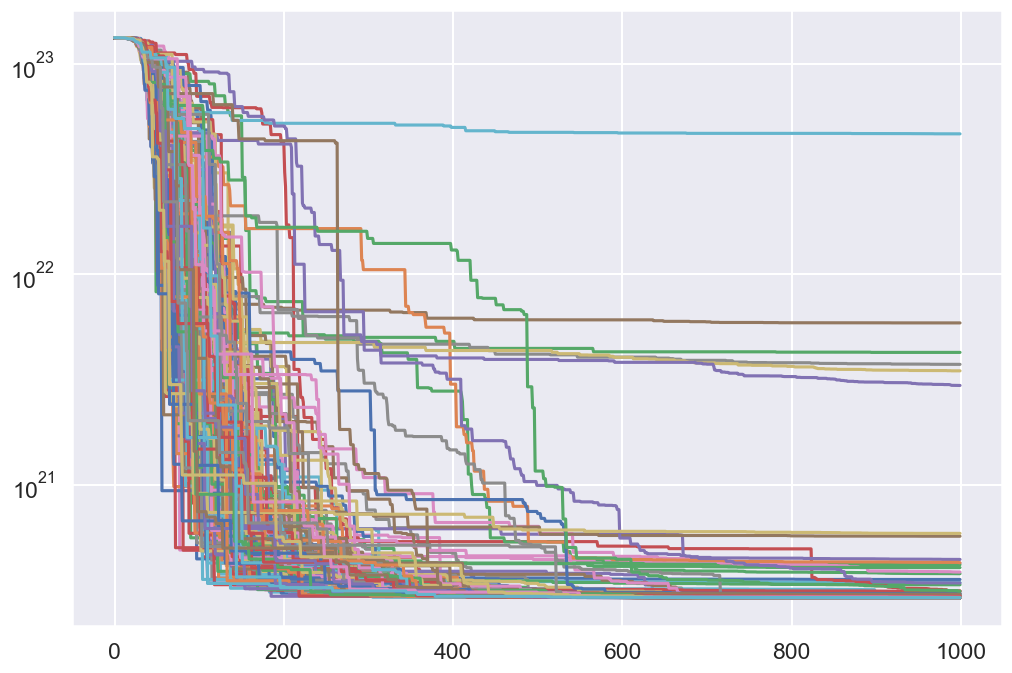

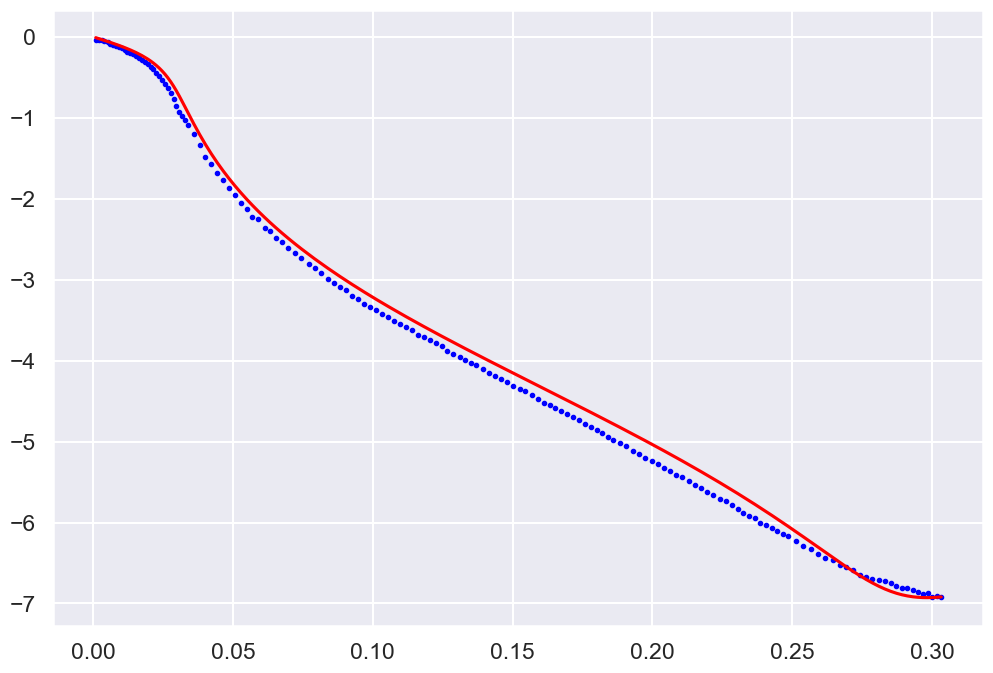

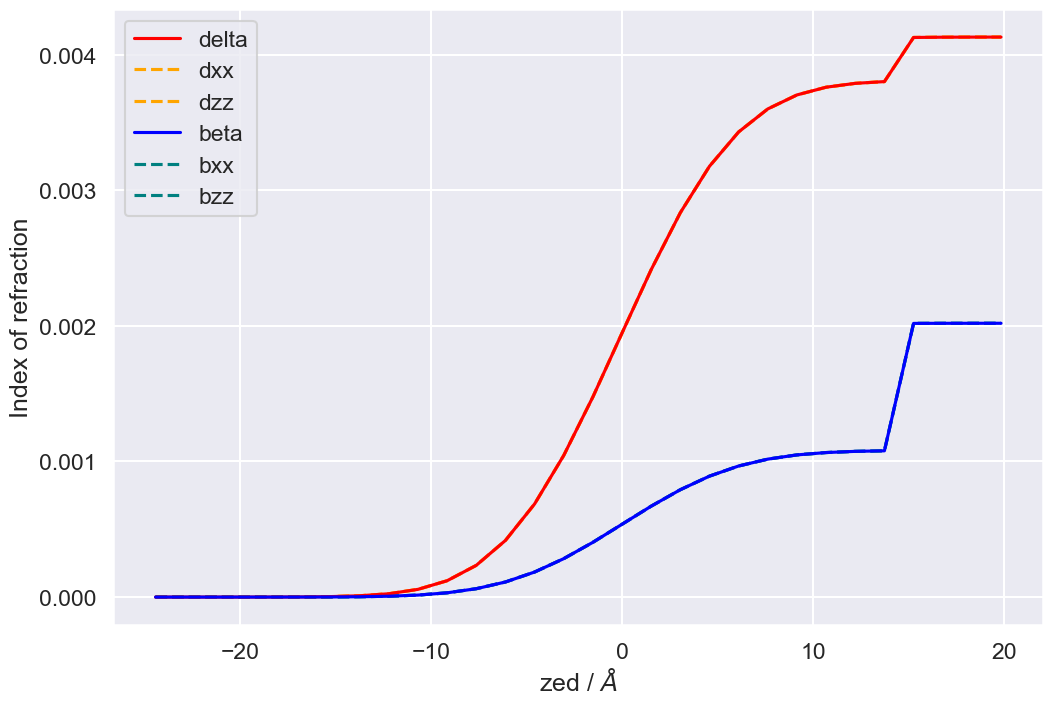

In [146]:
move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7, gamma0=1), 0.05)]
fitter1 = CurveFitter(obj_1, moves=move)
fitter1.initialise("jitter")
chain = fitter1.sample(1000, random_state=1)
print(obj_1.varying_parameters())
lp = fitter1.logpost
plt.plot(-lp)
plt.yscale("log")
obj_1.plot()
structure1.plot()